<a href="https://colab.research.google.com/github/apoorva-ppl/De-nile-Dreamers/blob/main/TestingAmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
import shutil

# Create Kaggle folder
!mkdir -p ~/.kaggle

# Move the file to the correct location
shutil.move("/content/kaggle.json", "/root/.kaggle/kaggle.json")

# Set correct permissions
!chmod 600 ~/.kaggle/kaggle.json


FileNotFoundError: [Errno 2] No such file or directory: '/content/kaggle.json'

In [4]:
import shutil

# Create Kaggle directory
!mkdir -p ~/.kaggle

# Move the uploaded kaggle.json file
shutil.move("/content/kaggle.json", "/root/.kaggle/kaggle.json")

# Set correct permissions
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API key set up successfully!")


Kaggle API key set up successfully!


In [5]:
!kaggle datasets list


ref                                                           title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                     Netflix Movies and TV Shows                         1MB  2025-01-03 10:33:01          14199        369  1.0              
asinow/car-price-dataset                                      Car Price Dataset                                 135KB  2025-01-26 19:53:28           3679         51  1.0              
ankushpanday1/alzheimers-prediction-dataset-global            Alzheimer’s Prediction Dataset (Global)             1MB  2025-01-30 14:38:39           1540         33  1.0              
asinow/airplane-price-dataset                                 Airplane Price Dat

In [6]:
!pip install kaggle


In [7]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database


Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 11.4MB/s]


In [9]:
import zipfile

with zipfile.ZipFile("pima-indians-diabetes-database.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")


In [10]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset/diabetes.csv")

# Show first 5 rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [11]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
df.fillna(df.mean(), inplace=True)


In [15]:
X = df.drop(columns=["Outcome"])  # Features
y = df["Outcome"]  # Target variable

from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")










Training samples: 614, Testing samples: 154


In [16]:
# //normalise the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



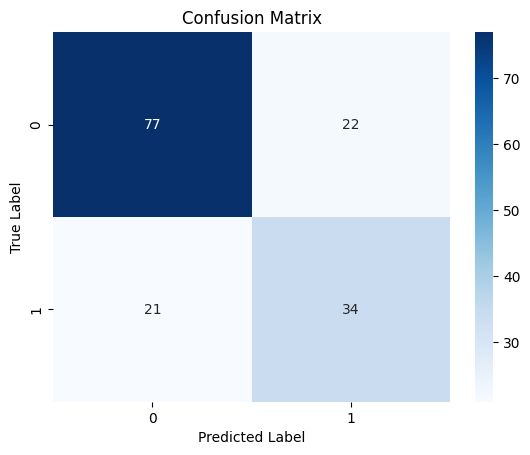

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [20]:
# Example new patient data
new_patient = [[6, 148, 72, 35, 0, 33.6, 0.627, 50]]  # Example feature values

# Apply same scaling
new_patient_scaled = scaler.transform(new_patient)

# Predict class (0 = No Diabetes, 1 = Diabetes)
predicted_class = model.predict(new_patient_scaled)
print("Predicted Class:", "Diabetic" if predicted_class[0] == 1 else "Non-Diabetic")


Predicted Class: Diabetic
